##  Network based statistic (NBS)
Performing statistical tests on graphs

[The original paper](https://www.sciencedirect.com/science/article/abs/pii/S1053811910008852)

Network based statistic is a permutation test (non-parametric) to assess whether networks are different, and elegantly solves the problem of multiple testing compared to doing multiparametric t-tests, thereby increasing statistical power (i.e. higher sensitivity) - the ability to correctly identify true positives. It is based on identifying the size of the largest connected component of a graph (at various thresholds), and doing a simple permutation test on this value.

### Pros and cons of NBS

**Pros**
* It let's you easily test hypotheses about group differences in networks (e.g. connectomes between sick and healthy).
* There is no hard math
* It deals naturally with graph structures

**Cons**
* It is hard to interpret what the difference actually is
* There is no obvious "right" value for the threshold (kappa)
* It is computationally heavy (like all permutation tests)


It works as follows: Choose a binary threshold kappa, and calculate the 
size of the largest connected component. This is your statistic, theta.

Now, randomly reassign the labels (i.e. sick vs healthy) to each graph,
and recalculate the LCC. Repeat N times (e.g.N=1000). This provides you
with a null distribution, which can be plotted in a histogram. 
Finally compare the test statistic theta to the distribution, to 
see if it deviates from the null distribution. 

If the difference reaches significance, we can be assured that 
there is a difference between the two experimental groups.

Tip: do the test at multiple threshold levels (kappa).


In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import sys

In [8]:
sys.executable

'C:\\Users\\Peder\\Anaconda3\\envs\\cbm101\\python.exe'

NBS is implemented in the Brain Connectivity Toolbox for Python `bctpy`. If you don't have it already installed, uncomment and run the cell below.

In [11]:
#!{sys.executable} -m pip install bctpy

  Using cached https://files.pythonhosted.org/packages/8e/56/e0505aeae481d5a5f780dccad3126fda1cab69532fdd6ca2a6280c309e63/bctpy-0.5.0.tar.gz
  Created wheel for bctpy: filename=bctpy-0.5.0-cp37-none-any.whl size=76645 sha256=6e7f0e964e94a6f5fa4e3073d2bf45a1b1927521782edcfb5dc39fa61d2ce701
  Stored in directory: C:\Users\Peder\AppData\Local\pip\Cache\wheels\22\83\31\bf64fd3cfc2034ca09ae97cc3621a583f155597260aa33dab3
Successfully built bctpy


In [17]:
!conda list bctpy

# packages in environment at C:\Users\Peder\Anaconda3\envs\cbm101:
#
# Name                    Version                   Build  Channel
bctpy                     0.5.0                    pypi_0    pypi


In [21]:
import bct
from bct import nbs

In [54]:
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler as scaler

In [57]:
all_subjects = np.random.rand(15,15,50) # N=50, nodes=15
group1 = all_subjects[:,:,:25]
group2 = all_subjects[:,:,25:]

In [58]:
from matplotlib import pyplot as plt

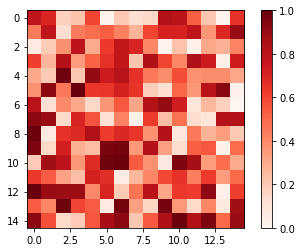

In [68]:
sub0 = group1[:,:,0] 
plt.imshow(sub0, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.colorbar()

Since we drew both groups out of the same population `all_subjects`, there should be no group difference between the two.

In [78]:
kappa = 0.8 # just keep weights stronger than 0.8 
pval, adj, null = nbs.nbs_bct(group1, group2, kappa)

max component size is 49
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 1.000
permutation 100 of 1000.  p-value so far is 0.297
permutation 200 of 1000.  p-value so far is 0.224
permutation 300 of 1000.  p-value so far is 0.243
permutation 400 of 1000.  p-value so far is 0.229
permutation 500 of 1000.  p-value so far is 0.220
permutation 600 of 1000.  p-value so far is 0.206
permutation 700 of 1000.  p-value so far is 0.211
permutation 800 of 1000.  p-value so far is 0.212
permutation 900 of 1000.  p-value so far is 0.212
permutation 999 of 1000.  p-value so far is 0.222


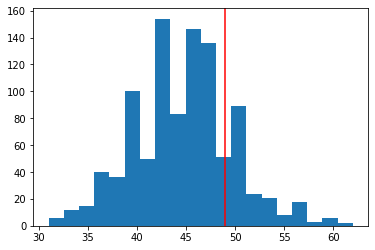

In [79]:
plt.hist(null, bins=20)
plt.axvline(49, c='red', )

**Conclusion:** the test statistic is well within the expected range under the null hypothesis, so we have no reason to assume a group difference.